# Qualitative analysis and Bifurcation diagram Tutorial in R

*This tutorial assumes you have read the [tutorial on numerical integration](http://nbviewer.ipython.org/github/diogro/ode_examples/blob/master/Numerical%20Integration%20Tutorial%20-%20R.ipynb?create=1).*



## Exploring the parameter space: bifurcation diagrams

Bifurcation diagrams represent the (long-term) solutions of a model as a function of some key variable. The idea is that, as this parameter changes, the solutions change in a "well-behaved" way, and that helps us understand better the general behavior of the model.

In this tutorial, we are going to study a simple predator-prey model (the Rosenzweig-MacArthur), and see how the amount of resources for prey ($K$) changes the dynamics.

### The Rosenzweig-MacArthur consumer-resource model

This model is expressed as:

$$ \begin{aligned}
\frac{dR}{dt} &= rR \left( 1 - \frac{R}{K} \right) - \frac{a \frac{R}{C}}{1+ah\frac{R}{C}} C \\
\frac{dC}{dt} &= C \frac{e a \frac{R}{C}}{1+ah\frac{R}{C}} - d C
\end{aligned} $$

#### Rosenzweig–MacArthur model solutions

We use the same method as before to integrate this model numerically:

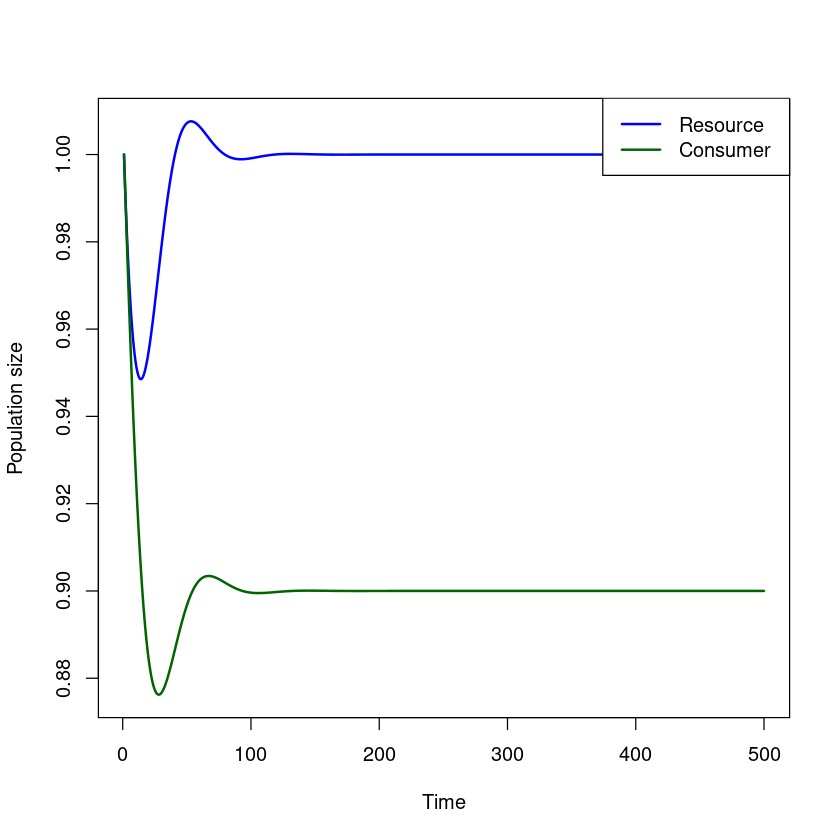

In [11]:
##Loading the necessary libraries
library(deSolve)

### Rosenzweig-MacArthur model###

## ODE system to be integrated
RM <- function(t, y, parms){
    with(as.list(c(y, parms)),
         {
             dR = r*R*(1-R/K) - a*R/(1+a*h*R/C)
             dC = e*a*R/(1 + a*h*R/C) - d*C
             return(list(c(R=dR,C=dC)))
         })
}

##initial parameters
parms1 = c(r=1, K=10, a=1., h=0.1, e=0.1, d=0.1)

##initial population sizes
y0 = c(R=1,C=1)

##running the numerical solution from time 1 to 1000
out = ode(y=y0, times = seq(from=1, to=500, by=0.5), func = RM, parms = parms1)

##plotting the solution
    matplot(x=out[,1], y=out[,2:3], type = "l", lwd=2, lty=1,
            col=c("blue", "darkgreen"), xlab="Time", ylab="Population size")
    legend("topright", legend = c("Resource","Consumer"), 
           lty = 1, lwd=2, col=c("blue", "darkgreen"))

#### For jupyter notebook only
options(jupyter.plot_mimetypes = 'image/png')
####

For the parameters chosen above, the long-term (asymptotic) solution is a fixed point. Let's see this in the phase space, that is, the space of Predators ($P$) vs. Prey ($V$). We note that the arrows are "circulating", but always point inwards, and so the trajectory moves toward the middle, to the fixed point.

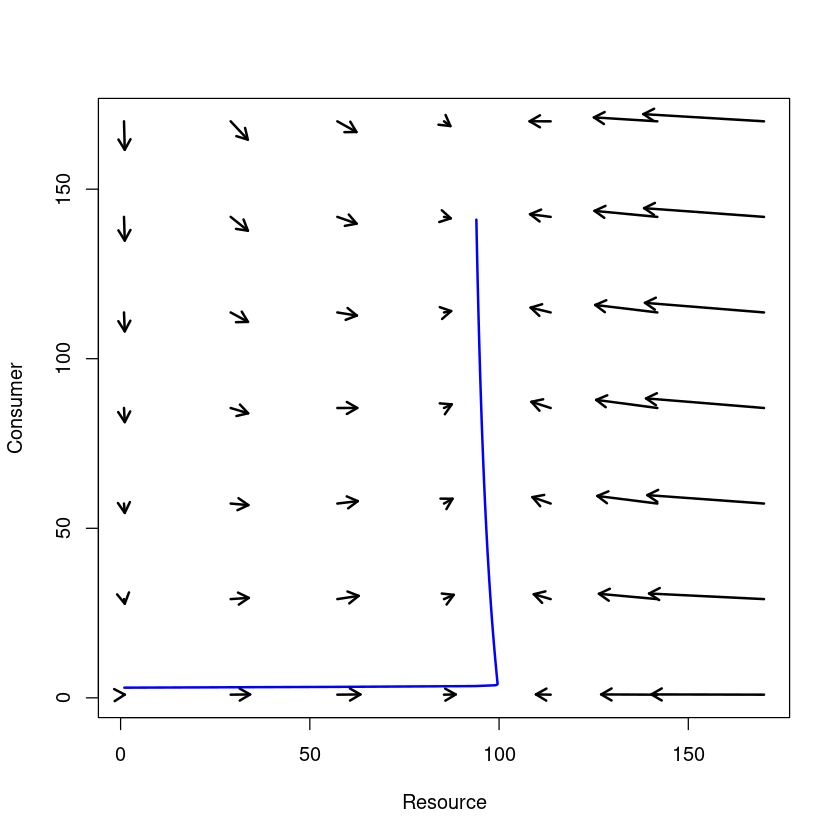

In [2]:

## Phase space flow and fixed points
##first we need to calculate the coordinates for the vectors
xs = seq(from=0.9, to=170, length.out=7)
ys = seq(from=0.94, to=170, length.out=7)
coords = expand.grid(R=xs, C=ys)
## And then loop over all coordinates to calculate the derivatives at that points
dvs = matrix(NA, ncol=2, nrow=nrow(coords))
for(i in 1:nrow(coords))
    dvs[i,] = unlist(RM(t=1, y = coords[i,], parms = parms1))

##now we plot the trajectory
    plot(x=out[,2], y=out[,3], type="l", lwd=2, col="blue",
        xlab="Resource",ylab="Consumer", xlim=c(0.9,170), ylim=c(0.94,170))
    ##and add the vector field
    arrows(x0=coords[,1], y0=coords[,2], x1=coords[,1]+dvs[,1]*0.05,
           y1=coords[,2]+dvs[,2]*0.5, length=0.1, lwd=2)


#### Messing a little with the parameters...

Increasing the carrying capacity $K$ from $10$ to $15$, we now see oscillations...

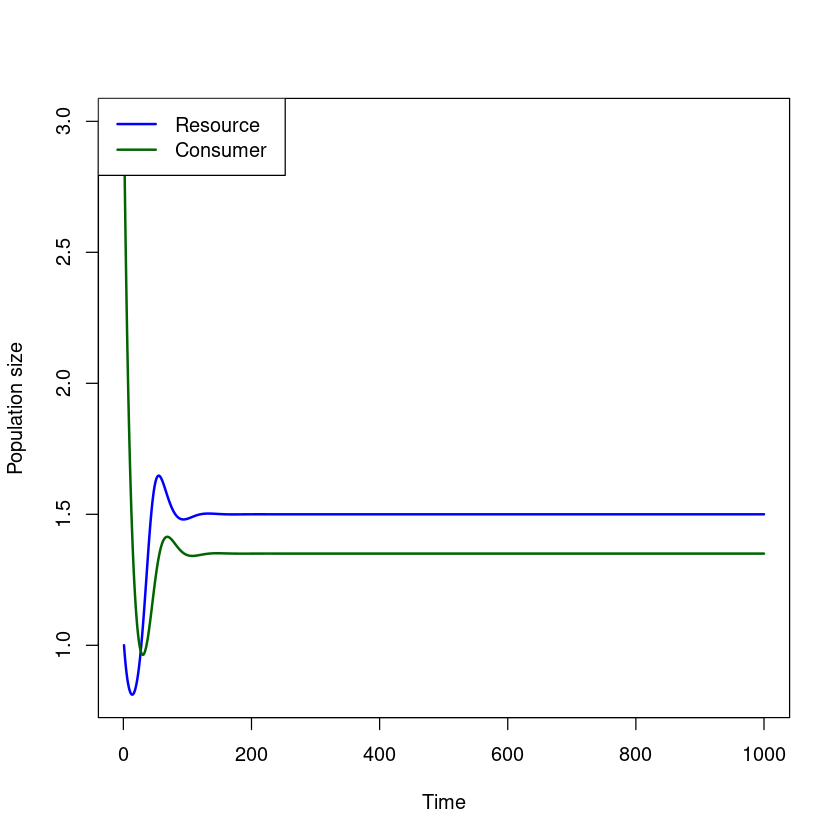

In [3]:
# now K = 15
##Messing a little with the parameters
parms2 = c(r=1, K=15, a=1, h=0.1, e=0.1, d=0.1)

out2 = ode(y=y0, times = seq(from = 1, to = 1000, by=0.5), func = RM, parms = parms2)

##plotting the solution
    matplot(x=out2[,1], y=out2[,2:3], type = "l", lwd=2, lty=1,col=c("blue", "darkgreen"),
            xlab="Time", ylab="Population size")
    legend("topleft", legend = c("Resource","Consumer"), lty = 1, lwd=2,
           col=c("blue", "darkgreen"))

And, looking again at the phase space plot, we now see that the flux (the arrows) inside circles outwards, towards a limit cycle, and the arrows outside points inwards. The limit cycle corresponds to the periodic solution we just saw.

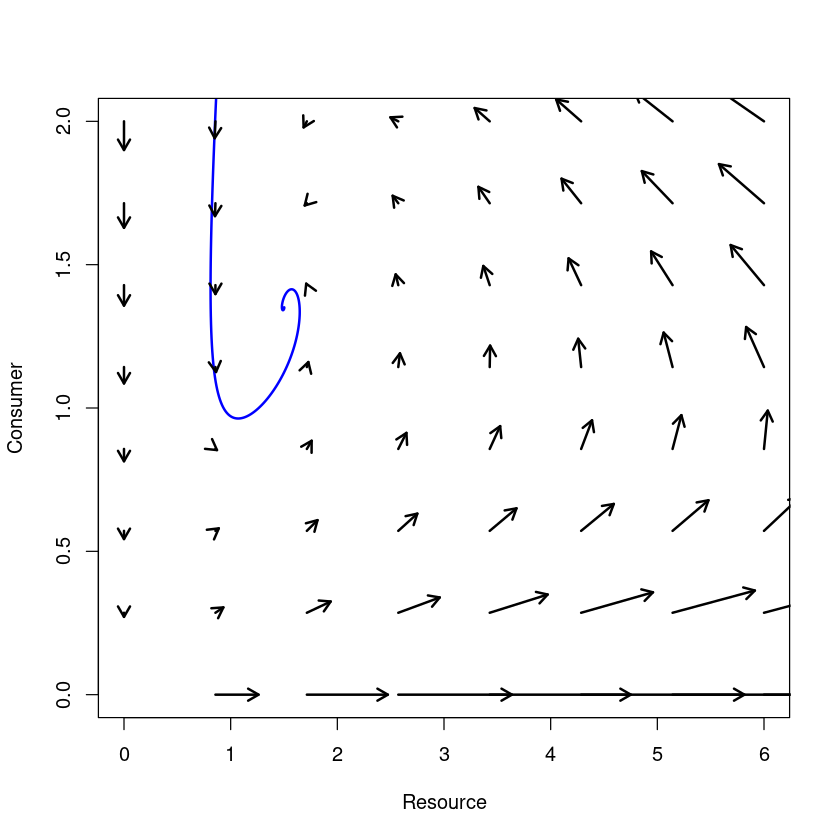

In [4]:
##calculating the vectors again
xs = seq(from=0,to=6,length.out=8)
ys = seq(from=0,to=2,length.out=8)
coords = expand.grid(R=xs,C=ys)
dvs = matrix(NA, ncol=2, nrow=nrow(coords))
for(i in 1:nrow(coords))
    dvs[i,] = unlist(RM(t=1, y = coords[i,], parms = parms2))

##The trajectory
    plot(x=out2[,2],y=out2[,3], type="l", lwd=2, col="blue",
         xlab="Resource", ylab="Consumer", xlim=c(0,6),ylim=c(0,2))
    ##and vectors
    arrows(x0=coords[,1], y0=coords[,2], x1=coords[,1]+dvs[,1]*0.5,
           y1=coords[,2]+dvs[,2]*0.5, length=0.1, lwd=2)


### The bifurcation diagram

We have seen the solutions for two values of $K$, $10$ and $15$, so we want to plot those as a function of $K$. In the second case, there are oscilations, so instead of taking all of the solution, we just pick the minimum and maximum of the solution (after a long time). When the solution is a fixed point, the minimum and maximum should coincide.

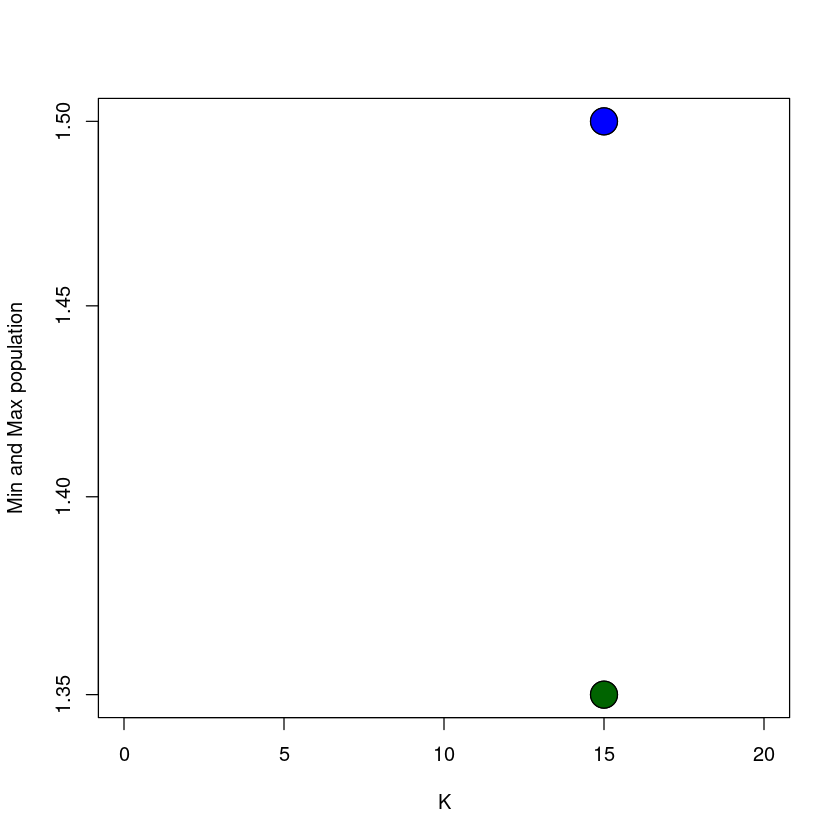

In [5]:
##plotting minimum and maximum population sizes with different K values

##object with the line numbers we will use for the following plot
lines = (nrow(out)-500):nrow(out)

##creating an empty plot
    plot(0.1, type="n", xlim=c(0,20), ylim=range(out2[lines,2:3]), log="y",
         xlab="K", ylab="Min and Max population")

##points for the K = 10
    points(x = c(10,10), y = range(out[lines,3]), pch=21,bg="darkgreen", cex=3)
    points(x = c(10,10), y = range(out[lines,2]), pch=21,bg="blue", cex=3)

##points for the K = 15
    points(c(15,15), range(out2[lines,3]), pch=21,bg="darkgreen", cex=3)
    points(c(15,15), range(out2[lines,2]), pch=21,bg="blue", cex=3)


This is a very poor bifurcation diagram: it has only two points in $K$! Let's try with many values of $K$.

What happens when we change the carrying capacity $K$ from very small values up to very large values? For very small values, the resource is not going to sustain the consumer population, but for larger values ok $K$, both species should be benefited... right?

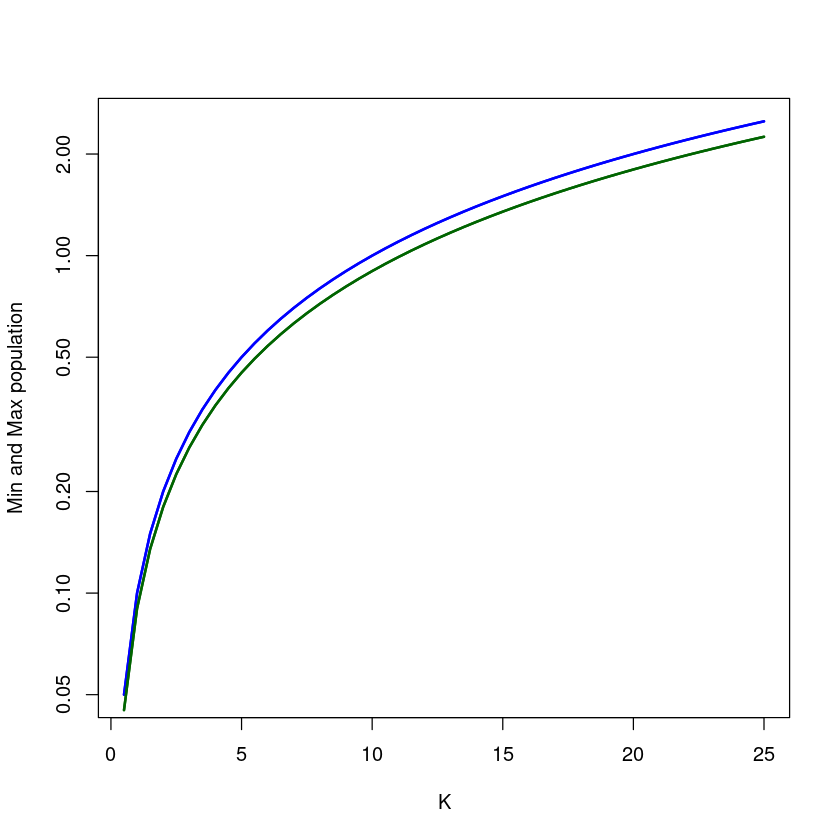

In [6]:
## this block calculates solutions for many K's, it should take some time
KK = seq(from = 0.5, to=25, by=0.5)
rminmax = matrix(NA, ncol=2, nrow=length(KK))#resource minimum and maximum
cminmax = matrix(NA, ncol=2, nrow=length(KK))#consumer minimux ans maximum

## Loop over all values of K andd get min and max population sizes
for(i in 1:length(KK)){
    parmsi = c(r=1, K=KK[i], a=1, h=0.1, e=0.1, d=0.1)  
    y0 = c(R=1,C=1)
    out3 = ode(y=y0, times = seq(from = 1, to = 1000, by=0.5), func = RM, parms = parmsi)
    rminmax[i,] = range(out3[(nrow(out3)-500):nrow(out3),2])
    cminmax[i,] = range(out3[(nrow(out3)-500):nrow(out3),3])
}
    plot(x=KK, y=rminmax[,1], type="l", lwd=2, col="blue",ylim=range(rminmax), log="y",
         xlab="K", ylab="Min and Max population")
    points(x=KK, y=rminmax[,2], type="l", lwd=2, col="blue")
    points(x=KK, y=cminmax[,1], type="l", lwd=2, col="darkgreen",ylim=range(rminmax))
    points(x=KK, y=cminmax[,2], type="l", lwd=2, col="darkgreen",ylim=range(rminmax))


Well, the first prediction was OK (notice that the plot above uses a log scale), but for high $K$, the minima of the oscillation go to very low values, so that the populations have a high risk of extinction. This phenomenon is the so-called **paradox of enrichment**.



### Consumer-resource dynamics in a seasonal environment

A special type of bifurcation diagram can be used when we have parameters that oscilate with time, and we want to see how this interacts with the system. Let's consider the Rosenzweig-MacArthur equations again, but now we make $r$, the growth rate of the prey, oscilate sinusoidally in time:

$$ \begin{aligned}
\frac{dR}{dt} &= r(t) R \left( 1 - \frac{R}{K} \right) - \frac{a R C}{1+ahR} \\
\frac{dC}{dt} &= \frac{e a R C}{1+ahR} - d C \\
r(t) &= r_0 (1+\alpha \sin(2\pi t/T))
\end{aligned} $$

We integrate this in the usual manner:

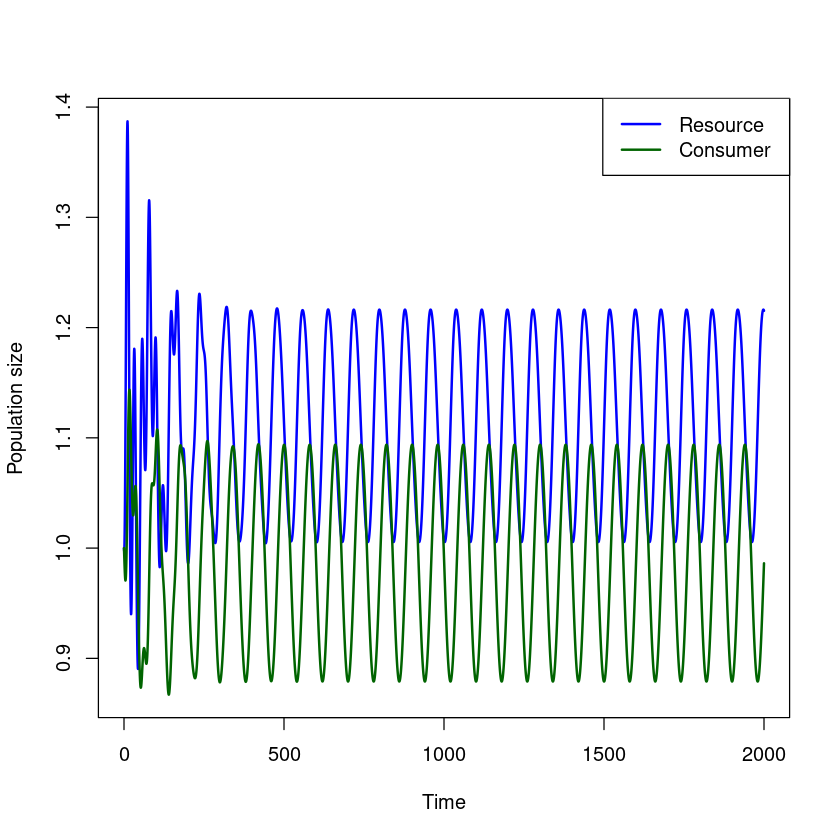

In [7]:
### Consumer-resource dynamics in a seasonal environment ###
## time sequence 
time <- seq(0, 2000, by = .5)

## parameters: a named vector
parameters <- c(r0=1, alpha=0.1, T=80, K=10, a=1, h=0.1, e=0.1, d=0.1)

## initial conditions: a named vector
state <- c(R = 1, C = 1)

## R function to calculate the value of the derivatives at each time value
## Use the names of the variables as defined in the vectors above
RM2 <- function(t, state, parameters){
    with(as.list(c(state, parameters)), {
        r = r0 * (1 + alpha*sin(2*pi*t/T))
        dR = R * ( r*(1 - R/K) - a*C / (1 + a*h*R) )
        dC = e*a*R*C / (1 + a*h*R) - d*C
        return(list(c(dR, dC)))
    })
}

## Integration with 'ode'
out <- ode(y = state, times = time, func = RM2, parms = parameters)

## Ploting with matplot
    matplot(x = out[,1], y = out[,2:3], type="l", lwd=2, lty = 1,
            col=c("blue", "darkgreen"), xlab = "Time", ylab = "Population size")
    legend("topright", c("Resource", "Consumer"), lty=1, lwd=2, col=c("blue", "darkgreen"))

Notice that, even with small $K$, the solutions oscilate due to the oscilation of $r(t)$.

Now we use a tool that is an all-time favorite of physicists: the resonance diagram. It works exactly as a bifurcation diagram, but the parameter that is changed is the period (or frequency) of the external oscilation.

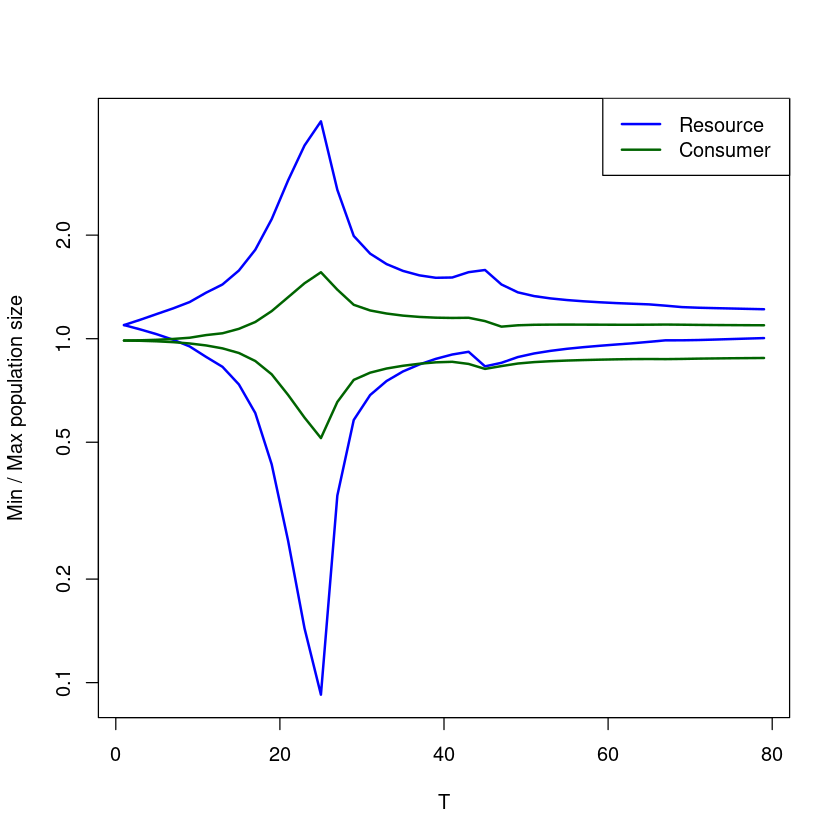

In [8]:
## A resonance diagram ##
## New time sequence 
time <- seq(0, 6000, by = 1)
## Sequence of values of T
TT <- seq(1, 80, by = 2)
## A matrix to store the results
results <- matrix(ncol=4, nrow=length(TT),
                  dimnames=list(NULL, c("R.min","R.max","C.min","C.max")))
## Loop over all values in TT
for(i in 1:length(TT)){
    parameters <- c(r0=1, alpha=0.1, T=TT[i], K=10, a=1, h=0.1, e=0.1, d=0.1)
    tmp1 <- ode(y = state, times = time, func = RM2, parms = parameters)
    results[i,1:2] <- range(tmp1[1001:nrow(tmp1), 2])
    results[i,3:4] <- range(tmp1[1001:nrow(tmp1), 3])
}

## Plot of resonance diagram
    plot(R.min ~ TT , data=results, type="l", lwd=2, lty = 1,
         col="blue", xlab = "T", ylab = "Min / Max population size",
         log="y", ylim = range(results))
    lines(R.max ~ TT, data=results,  type="l", lwd=2, lty = 1, col=c("blue"))
    lines(C.min ~ TT, data=results,  type="l", lwd=2, lty = 1, col=c("darkgreen"))
    lines(C.max ~ TT, data=results,  type="l", lwd=2, lty = 1, col=c("darkgreen"))   
    legend("topright", c("Resource", "Consumer"), lty=1, lwd=2, col=c("blue", "darkgreen"))

We see a strong peak! (remember that this is a log scale). The frequency at which this peak occurs is the **resonant frequency** of the system, and is related to the natural frequency of the system (that exists even when it goes to a fixed point with constant parameters!). The external oscilation excites the natural frequency and drives large amplitude cycles, just like when we push a seesaw (ou gangorra, o balancín).

## What if I really want to explore a 10-dimensional parameter space?

First: good luck. Second, you will probably have to sample the space, rather than go through the whole thing. The recommended method to do it is using so-called [Latin Hypercube samples](http://en.wikipedia.org/wiki/Latin_hypercube_sampling), that uses a random sampling while ensuring a roughly regularly-spaced distribution. Notice, though, that this method is a way to sample the parameter space and do useful statistics with it, so the result will only make sense if you know how to properly interpret the outcomes. That said, there are implementations for both R and python:

* [R-Cran pse: Parameter space exploration](http://cran.r-project.org/web/packages/pse/)
* [PyDOE: design of experiments for Python](http://pythonhosted.org/pyDOE/randomized.html)